# EDA: Plotting Weather Conditions Against Mosquito Abundance

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [2]:
df = pd.read_csv('../data/final_dataframe.csv', index_col=0)

**Columns have been shifted**

In [3]:
df.columns

Index(['Trap', 'Species', 'NumMosquitos', 'WnvPresent', 'Day_length', 'Tmax',
       'Tmin', 'Tavg', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Sunset',
       'Sunrise', 'Heat', 'Depart', 'DewPoint', 'WetBulb', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure', 'Date', 'Latitude', 'Longitude', 'Month'],
      dtype='object')

In [4]:
plt.figure(figsize=(15,15))
df.corr()

,NumMosquitos,WnvPresent,Day_length,Tmax,Tmin,Tavg,ResultSpeed,ResultDir,AvgSpeed,Sunset,...,Heat,Depart,DewPoint,WetBulb,Cool,PrecipTotal,StnPressure,Latitude,Longitude,Month
NumMosquitos,1.000000e+00,2.325071e-01,2.600100e-02,5.710975e-02,6.707573e-02,6.554450e-02,-3.515264e-03,-1.558804e-02,1.840583e-03,3.174689e-02,...,-4.183374e-02,3.683174e-02,-2.396084e-15,5.863445e-02,6.625508e-02,-1.521408e-02,7.917151e-03,-5.701232e-02,-2.493159e-03,-8.198467e-03
WnvPresent,2.325071e-01,1.000000e+00,-7.396398e-02,5.997775e-02,8.873438e-02,7.830815e-02,-5.266001e-02,-1.304697e-03,-3.602414e-02,-6.062210e-02,...,-5.831994e-02,6.536316e-02,-1.071897e-14,9.440782e-02,7.500012e-02,-7.025656e-03,2.492389e-02,3.229781e-02,-7.711310e-02,9.886850e-02
Day_length,2.600100e-02,-7.396398e-02,1.000000e+00,1.567827e-01,2.338259e-01,2.045247e-01,1.050518e-01,-3.517688e-02,1.039972e-01,9.835851e-01,...,-2.314760e-01,-2.806494e-01,-6.226171e-15,1.086087e-01,1.564293e-01,1.649567e-01,-1.437130e-01,2.737976e-02,-2.446524e-02,-9.211585e-01
Tmax,5.710975e-02,5.997775e-02,1.567827e-01,1.000000e+00,7.837069e-01,9.500391e-01,-2.207805e-02,1.848661e-01,1.107499e-02,2.073171e-01,...,-7.557791e-01,8.166832e-01,9.780629e-15,7.620599e-01,8.858615e-01,9.180543e-02,-7.965560e-02,-1.228149e-02,4.067485e-02,-1.065289e-02
Tmin,6.707573e-02,8.873438e-02,2.338259e-01,7.837069e-01,1.000000e+00,9.379846e-01,5.115248e-02,1.259186e-01,1.514263e-01,2.796547e-01,...,-6.876115e-01,7.039355e-01,4.367318e-15,8.055124e-01,9.038195e-01,2.284177e-01,-1.290074e-01,-2.761859e-02,4.722244e-02,-8.514082e-02
Tavg,6.554450e-02,7.830815e-02,2.045247e-01,9.500391e-01,9.379846e-01,1.000000e+00,1.012837e-02,1.644862e-01,8.033201e-02,2.556704e-01,...,-7.658424e-01,8.068591e-01,1.362211e-14,8.283671e-01,9.472424e-01,1.664239e-01,-1.091188e-01,-2.041983e-02,4.620182e-02,-4.737868e-02
ResultSpeed,-3.515264e-03,-5.266001e-02,1.050518e-01,-2.207805e-02,5.115248e-02,1.012837e-02,1.000000e+00,2.132027e-01,9.024422e-01,8.636726e-02,...,1.650517e-02,2.608823e-02,-7.726295e-14,-2.490492e-02,2.168739e-02,1.526857e-01,-3.895319e-02,1.027285e-03,1.339934e-02,-1.609664e-01
ResultDir,-1.558804e-02,-1.304697e-03,-3.517688e-02,1.848661e-01,1.259186e-01,1.644862e-01,2.132027e-01,1.000000e+00,2.816556e-01,-1.215696e-02,...,-1.434181e-01,1.318604e-01,-2.162505e-15,2.060986e-01,1.471115e-01,3.381726e-03,1.354420e-01,-1.422650e-02,2.341085e-02,5.168287e-02
AvgSpeed,1.840583e-03,-3.602414e-02,1.039972e-01,1.107499e-02,1.514263e-01,8.033201e-02,9.024422e-01,2.816556e-01,1.000000e+00,8.473892e-02,...,9.040456e-03,1.007949e-01,1.088234e-14,5.970099e-02,1.112657e-01,2.870751e-01,-5.372855e-02,-1.271181e-02,2.978722e-02,-1.740464e-01
Sunset,3.174689e-02,-6.062210e-02,9.835851e-01,2.073171e-01,2.796547e-01,2.556704e-01,8.636726e-02,-1.215696e-02,8.473892e-02,1.000000e+00,...,-2.678778e-01,-2.511116e-01,-2.056988e-15,1.576253e-01,2.062562e-01,1.489995e-01,-1.262157e-01,1.748182e-02,-1.711397e-02,-8.652102e-01


<Figure size 1080x1080 with 0 Axes>

In [5]:
df['Day_length'].index[84:]

Int64Index([  84,   85,   86,   87,   88,   89,   90,   91,   92,   93,
            ...
            8633, 8634, 8635, 8636, 8637, 8638, 8639, 8640, 8641, 8642],
           dtype='int64', length=8559)

In [6]:
np.corrcoef(df['Tavg'].rolling(3).mean().shift(14).dropna(), df['NumMosquitos'].drop(df.index[0:16]))

array([[1.        , 0.06561948],
       [0.06561948, 1.        ]])

### 'Grid Searching' Through Rolling & Shifted Feature Means

We created a function that will help us search through different permutations of rolling means, along with shifted days, to see which configuration will give us the highest correlation. Further, we plotted the best scoring correlations to see the relationships in more detail.

In [7]:
def hi_corr(f1, f2, rm_min=3, rm_max=7, min_val=1, max_val=30):
    corr_array = []
    new_array = []
    for k in range(rm_min, rm_max + 1):
        for i in range(min_val, max_val + 1):
            new_array.append(np.corrcoef(f1.rolling(k).mean().shift(i).dropna(), f2.drop(f2.index[:i+k-1]))[0,1])
            corr_array.append(np.corrcoef(f1.rolling(k).mean().shift(i).dropna(), f2.drop(f2.index[:i+k-1]))[0,1])
            new_array.append('Rolling Mean: {}'.format(k))
            new_array.append('Shifted Value: {}'.format(i))
    corr_max = max(corr_array)
    corr_min = min(corr_array)
    if abs(corr_min) > corr_max:
        windex = new_array.index(corr_min)
        print(corr_min, new_array[windex + 1], new_array[windex + 2])
    else:
        windex = new_array.index(corr_max)
        print(corr_max, new_array[windex + 1], new_array[windex + 2])
    return

Best Daylength Rolling Mean

In [8]:
hi_corr(df['Day_length'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=21, max_val=42)

0.03351765362052723 Rolling Mean: 1 Shifted Value: 40


In [9]:
np.corrcoef(df['Day_length'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.04006146],
       [0.04006146, 1.        ]])

In [125]:
df[df['Month'] == 6]

,Trap,Species,NumMosquitos,WnvPresent,Day_length,Tmax,Tmin,Tavg,ResultSpeed,ResultDir,...,DewPoint,WetBulb,Cool,CodeSum,PrecipTotal,StnPressure,Date,Latitude,Longitude,Month
25,T002,CULEX PIPIENS,1,0,54360,63.5,49.0,56.5,5.70,4.0,...,53.45788,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.954690,-87.800991,6
26,T002,CULEX PIPIENS/RESTUANS,3,0,54360,63.5,49.0,56.5,5.70,4.0,...,53.45788,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.954690,-87.800991,6
27,T002,CULEX RESTUANS,5,0,54360,63.5,49.0,56.5,5.70,4.0,...,53.45788,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.954690,-87.800991,6
28,T009,CULEX RESTUANS,2,0,54360,63.5,49.0,56.5,5.70,4.0,...,53.45788,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.981964,-87.812827,6
29,T009,CULEX RESTUANS,2,0,54360,63.5,49.0,56.5,5.70,4.0,...,53.45788,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.992478,-87.862995,6
30,T011,CULEX RESTUANS,1,0,54360,63.5,49.0,56.5,5.70,4.0,...,53.45788,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.944869,-87.832763,6
31,T015,CULEX PIPIENS/RESTUANS,1,0,54360,63.5,49.0,56.5,5.70,4.0,...,53.45788,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.974089,-87.824812,6
32,T015,CULEX RESTUANS,2,0,54360,63.5,49.0,56.5,5.70,4.0,...,53.45788,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.974089,-87.824812,6
33,T016,CULEX RESTUANS,1,0,54360,63.5,49.0,56.5,5.70,4.0,...,53.45788,51.5,0.0,RA BR,0.345,29.13,2007-06-05,42.011601,-87.811506,6
34,T019,CULEX RESTUANS,1,0,54360,63.5,49.0,56.5,5.70,4.0,...,53.45788,51.5,0.0,RA BR,0.345,29.13,2007-06-05,41.949830,-87.698457,6


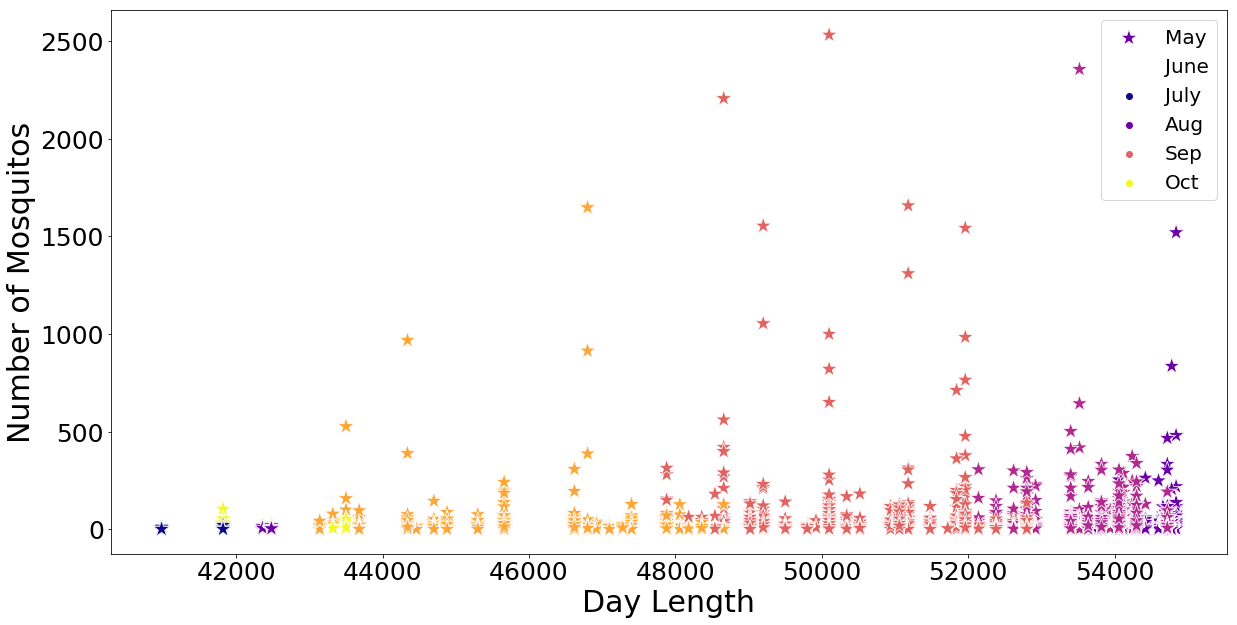

In [144]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['Day_length'].rolling(1).mean().shift(40).dropna(), df['NumMosquitos'].drop(df['NumMosquitos'].index[:40]),
               hue=df['Month'], marker='*', palette='plasma', s=300)
plt.xlabel('Day Length', size=30)
plt.xticks(size=25)
plt.ylabel('Number of Mosquitos', size=30)
plt.yticks(size=25)
plt.legend(labels=['May', 'June', 'July', 'Aug', 'Sep', 'Oct'], fontsize=20)

### Temperature Related

Best Temperature Rolling Mean

In [11]:
hi_corr(df['Tavg'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=7, max_val=21)

0.0666091429540884 Rolling Mean: 1 Shifted Value: 7


In [12]:
np.corrcoef(df['Tavg'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.05431909],
       [0.05431909, 1.        ]])

In [89]:
df['Month'].unique()

array([ 5,  6,  7,  8,  9, 10])

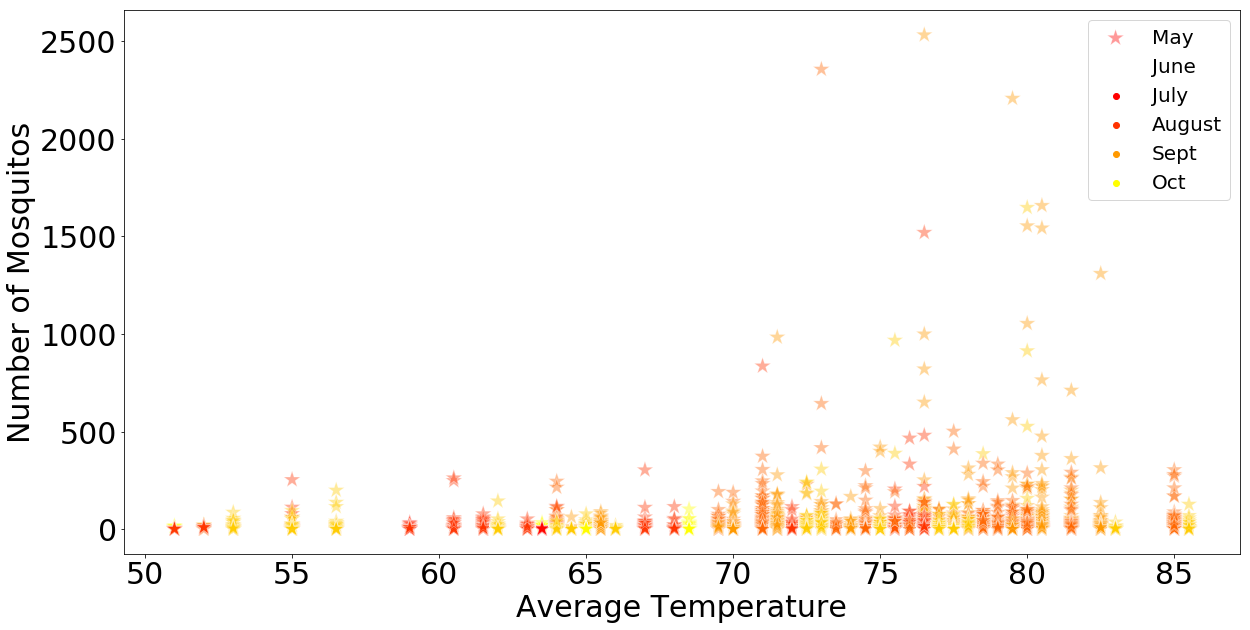

In [151]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['Tavg'].rolling(1).mean().shift(7).dropna(), df['NumMosquitos'].drop(df['NumMosquitos'].index[:7]), 
            alpha = .4, hue=df['Month'], marker='*', s=300 ,palette='autumn');
plt.xlabel('Average Temperature', size=30)
plt.xticks(size=30)
plt.ylabel('Number of Mosquitos', size=30)
plt.yticks(size=30)
plt.legend(['May', 'June', 'July', 'August', 'Sept', 'Oct'], fontsize=20);

In [14]:
hi_corr(df['Heat'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=7, max_val=21)

-0.041308292774105575 Rolling Mean: 7 Shifted Value: 8


In [15]:
np.corrcoef(df['Heat'].expanding().mean(), df['NumMosquitos'])

array([[ 1.        , -0.04675775],
       [-0.04675775,  1.        ]])

In [16]:
hi_corr(df['Cool'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=7, max_val=21)

0.06816173690042639 Rolling Mean: 1 Shifted Value: 7


In [17]:
np.corrcoef(df['Cool'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.05245493],
       [0.05245493, 1.        ]])

In [18]:
hi_corr(df['Tmax'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=7, max_val=21)

0.059233391961211114 Rolling Mean: 1 Shifted Value: 7


In [19]:
np.corrcoef(df['Tmax'], df['NumMosquitos'])

array([[1.        , 0.05710975],
       [0.05710975, 1.        ]])

In [20]:
np.corrcoef(df['Tmax'].expanding().mean(), df['NumMosquitos'])

array([[1.       , 0.0469504],
       [0.0469504, 1.       ]])

In [21]:
hi_corr(df['Tmin'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=7, max_val=21)

0.06767516243864329 Rolling Mean: 1 Shifted Value: 10


In [22]:
np.corrcoef(df['Tmin'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.05988869],
       [0.05988869, 1.        ]])

Best Departure Rolling Mean

In [23]:
hi_corr(df['Depart'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=7, max_val=21)

0.037569483464707176 Rolling Mean: 1 Shifted Value: 7


In [24]:
np.corrcoef(df['Depart'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.00508592],
       [0.00508592, 1.        ]])

### Wind Related

Best Wind Speed Rolling Mean

In [25]:
hi_corr(df['ResultSpeed'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=14, max_val=28)

-0.009319060722963545 Rolling Mean: 7 Shifted Value: 28


In [26]:
np.corrcoef(df['ResultSpeed'].expanding().mean(), df['NumMosquitos'])

array([[ 1.        , -0.00656348],
       [-0.00656348,  1.        ]])

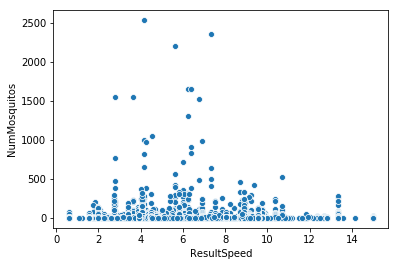

In [108]:
sns.scatterplot(df['ResultSpeed'].rolling(7).mean().shift(28), df['NumMosquitos']);

In [28]:
hi_corr(df['ResultDir'], df['NumMosquitos'], rm_min=1, rm_max=7, min_val=14, max_val=28)

0.00422555406684047 Rolling Mean: 1 Shifted Value: 18


In [29]:
np.corrcoef(df['ResultDir'].expanding().mean(), df['NumMosquitos'])

array([[1.       , 0.0291355],
       [0.0291355, 1.       ]])

### Precipitation Related

Best Total Precipitation

In [30]:
hi_corr(df['PrecipTotal'], df['NumMosquitos'], rm_min=1, rm_max=100, min_val=7, max_val=100)

0.06796524984931208 Rolling Mean: 50 Shifted Value: 42


In [31]:
np.corrcoef(df['PrecipTotal'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.07840287],
       [0.07840287, 1.        ]])

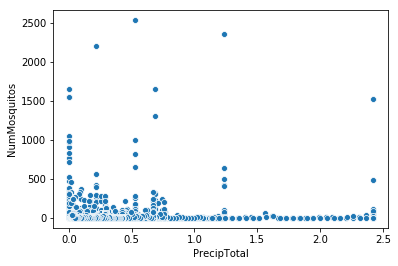

In [32]:
sns.scatterplot(df['PrecipTotal'].rolling(45).mean().shift(47), df['NumMosquitos'].drop(df['NumMosquitos'].index[:91]));

In [33]:
df['PrecipTotal'].value_counts().sort_index(ascending=True)

0.000    5071
0.005     335
0.010     101
0.015      93
0.025      52
0.030     124
0.075      18
0.080     117
0.085      35
0.090     206
0.100      87
0.105      87
0.130      77
0.140      18
0.165      83
0.220     183
0.255      19
0.260     127
0.280     120
0.290     134
0.295     153
0.345      61
0.420     108
0.450     105
0.480      45
0.530     354
0.625      61
0.670     103
0.685     184
0.740      64
0.755      63
1.070      50
1.235     116
2.420      89
Name: PrecipTotal, dtype: int64

The best rolling mean values for `PrecipTotal` tend to be the max passed through it. Given that, it appears that an expanding mean for total precipitation may give us the best results.

Best Wetbulb Rolling Mean
>The lowest temperature that can be reached by evaporating water into the air. Note: the wet bulb temperature will always be less than or equal to the temperature. It feels more comfortable when wet-bulb temperature is low. [Source] (http://apollo.lsc.vsc.edu/classes/met130/notes/chapter4/wet_bulb.html)

In [34]:
hi_corr(df['WetBulb'], df['NumMosquitos'], rm_min=1, rm_max=100, min_val=7, max_val=100)

0.07067325274604591 Rolling Mean: 100 Shifted Value: 7


In [35]:
np.corrcoef(df['WetBulb'].expanding().mean(), df['NumMosquitos'])

array([[1.        , 0.05825479],
       [0.05825479, 1.        ]])

Best Dewpoint Rolling Mean
 > the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form.

In [36]:
hi_corr(df['DewPoint'], df['NumMosquitos'], rm_min=1, rm_max=100, min_val=7, max_val=100)

/Users/jonjohnson/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/jonjohnson/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


-0.002170705197829583 Rolling Mean: 9 Shifted Value: 74


In [37]:
np.corrcoef(df['DewPoint'].expanding().mean(), df['NumMosquitos'])

array([[1.00000000e+00, 8.56341637e-04],
       [8.56341637e-04, 1.00000000e+00]])

In [38]:
# features = ['Tavg']

# new_df = df[['WnvPresent']].set_index(df['Date'])

# for f in features:
#     for roll in [1,2,3,4,5,6,7]:
#         columns = list(new_df.columns)
#         columns.append(f"{f}_with_roll_of_{roll}")
#         new_df = pd.concat([new_df, df[[f]].rolling(roll).mean().set_index(df['Date']).replace()], axis=1)
#         new_df.columns = columns    
# sns.heatmap(new_df.corr())

### Ensuring DataFrames are Correctly Setup

In [39]:
weather = pd.read_csv('../data/weather.csv')

In [40]:
weather.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


In [41]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [42]:
weather['PrecipTotal'].value_counts().sort_index(ascending=True)[:5]

  T      318
0.00    1577
0.01     127
0.02      63
0.03      46
Name: PrecipTotal, dtype: int64

In [43]:
df.columns

Index(['Trap', 'Species', 'NumMosquitos', 'WnvPresent', 'Day_length', 'Tmax',
       'Tmin', 'Tavg', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Sunset',
       'Sunrise', 'Heat', 'Depart', 'DewPoint', 'WetBulb', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure', 'Date', 'Latitude', 'Longitude', 'Month'],
      dtype='object')

In [44]:
df['Day_length'].value_counts().sort_index(ascending=True)

40980     20
41820    183
42360     64
42480     54
43140     89
43320    132
43500    157
43680    101
44340    200
44460     98
44700    118
44880    111
45300    102
45660    381
46620    148
46800     58
46920     91
47100     51
47280     33
47400     62
47880    114
48060     29
48180     50
48360    103
48540     70
48660    183
49020    214
49200    184
49500    110
49800     21
        ... 
51060    174
51180    304
51480    130
51720      2
51840     79
51960    433
52140    117
52380    116
52620    139
52800    294
52920     83
53400    169
53520    116
53640    144
53700     57
53760     25
53820    144
53940     43
54060    226
54120    270
54180      4
54240     87
54300    103
54360    136
54420    174
54600     45
54660    163
54720    322
54780    322
54840    283
Name: Day_length, Length: 65, dtype: int64

In [45]:
df['Month'].value_counts().sort_index(ascending=False)

10     267
9     1986
8     2808
7     2136
6     1364
5       82
Name: Month, dtype: int64

In [46]:
df['CodeSum'].value_counts()

                       4338
RA BR                   763
RA                      707
HZ                      696
TSRA RA BR              353
BR HZ                   323
TSRA RA                 291
BR                      273
TS BR                   134
RA BR HZ                132
TSRA RA BR VCTS         116
RA DZ BR                114
TS TSRA RA FG BR HZ     108
TS TSRA BR               89
TSRA BR HZ VCTS          69
TS TSRA RA               61
DZ BR                    35
RA HZ                    23
TS RA                    18
Name: CodeSum, dtype: int64